In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import pandas as pd

In [2]:
data = pd.read_csv('creditcard.csv', header=0)


In [3]:
ground_truth = np.empty_like(data.iloc[:,30])

for i in range(len(data.iloc[:,30])):
    if data.iloc[i,30] == 1:
        
        ground_truth[i] = -1
    else: ground_truth[i] = 1

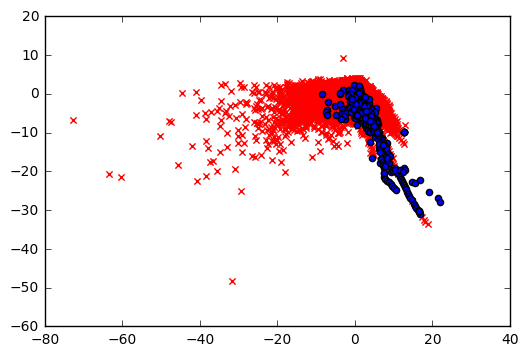

In [4]:
plt.scatter(data.iloc[:,2][data.iloc[:,30]==0], data.iloc[:,3][data.iloc[:,30]==0], marker = 'x', color='r')
plt.scatter(data.iloc[:,2][data.iloc[:,30]==1], data.iloc[:,3][data.iloc[:,30]==1], marker = 'o')

In [1]:
from sklearn.ensemble import IsolationForest
isol = IsolationForest(n_estimators=100, max_samples=10000, contamination=0.007,
                       max_features=1.0, bootstrap=False, n_jobs=-1, verbose=1)
isol.fit(data.iloc[:,:30])
y = isol.predict(data.iloc[:,:30])
err = (y != ground_truth).sum()
err

ImportError: cannot import name 'IsolationForest'

In [36]:
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score


In [72]:
y1 = np.empty_like(y)
for i in range(len(y)):
    if y[i] == -1:
        y1[i] = 1
    else: y1[i] = 0
roc_auc_score(data.iloc[:,30], y1)

0.80800707133920091

In [73]:
recall_score(ground_truth, y, pos_label=-1)

0.62195121951219512

In [74]:
precision_score(ground_truth, y, pos_label=-1)

0.1534603811434303

In [75]:
average_precision_score(data.iloc[:,30], y1)

0.38803233724579578

# XGBoost

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

ImportError: No module named 'xgboost'

In [67]:
seed = 7
test_size = 0.33
X = data.iloc[:,:30]
Y = data.iloc[:,30]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=test_size, random_state=seed) 

In [70]:
model = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100,
                      objective='binary:logistic', nthread=-1, seed=seed)
model.fit(trainX, trainY)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=7, silent=False, subsample=1)

In [71]:
ypred = model.predict(testX)
average_precision_score(testY, ypred)

0.87881939447668045